In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/drug/202004092336_drug_scores.tsv", sep='\t')

In [3]:
df = df.rename(columns={'MultiDrug_correlation':'Protein_correlation'})

In [4]:
df = df.sort_values(by=['Protein_correlation'], ascending=False)

In [5]:
df_top = df.head(10)[['DRUG_NAME', 'RNA_correlation', 'Protein_correlation']]
df_top.columns = ['DRUG_NAME', 'RNA', 'Protein']

In [6]:
df_top_melt = pd.melt(df_top,
                      id_vars='DRUG_NAME',
                      value_vars=['RNA', 'Protein'],
                      var_name='data',
                      value_name='correlation')

Text(0.5, 1.0, 'Top 10 best predicted drugs from protein data (MultiDrugNN 446 drugs)')

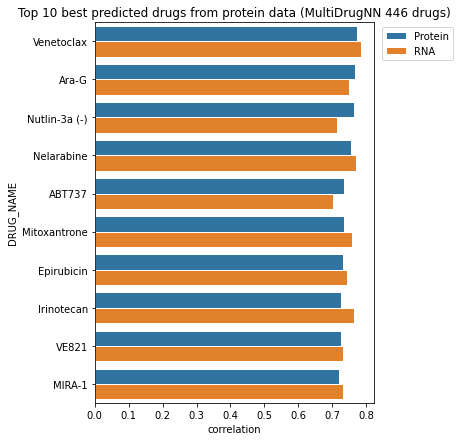

In [7]:
plt.figure(figsize=(5, 7))
g = sns.barplot(x='correlation',
                y='DRUG_NAME',
                data=df_top_melt,
                hue='data', hue_order=['Protein', 'RNA'],
                edgecolor="white")
g.legend(loc='upper right', bbox_to_anchor=(1.3, 1), ncol=1)
plt.title("Top 10 best predicted drugs from protein data (MultiDrugNN 446 drugs)")